### 1. Import the required libraries and modules that you would need.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### 2. Read that data into Python and call the dataframe churnData.

In [2]:
churnData = pd.read_csv('Customer-Churn.csv')

In [3]:
churnData.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,No,Yes,No,No,Yes,No,Month-to-month,89.10,1949.4,No
7,Female,0,No,No,10,No,Yes,No,No,No,No,No,Month-to-month,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-month,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,Yes,Yes,No,No,No,No,One year,56.15,3487.95,No


### 3. Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [4]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors = 'coerce')
churnData['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [6]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### 4. Check for null values in the dataframe. Replace the null values.

In [7]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

C:\Users\ebour\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


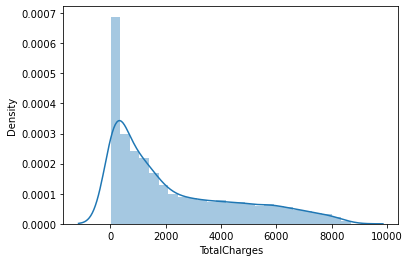

In [8]:
sns.distplot(churnData['TotalCharges'])
plt.show()

In [9]:
# TotalCharges is continuous, and 11 rows out of 7000 are not relly significant, so I'll replace them with the mean
# of the column
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(np.mean(churnData['TotalCharges']))
churnData.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 5. Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

In [10]:
features = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']].copy()
labels = churnData['Churn']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state = 42)

In [12]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 62).fit(X_train_scaled, y_train)
train_score = log_reg.score(X_train_scaled, y_train)
pred = log_reg.predict(X_test_scaled)
test_score = log_reg.score(X_test_scaled, y_test)
print('score on train set is:' + str(round(train_score,5)))
print('score on test set is:' + str(round(test_score,5)))

score on train set is:0.78872
score on test set is:0.79898


In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("precision: ",precision_score(y_test,pred, pos_label='Yes'))
print("recall: ",recall_score(y_test,pred, pos_label='Yes'))
print("f1: ",f1_score(y_test,pred, pos_label='Yes'))

precision:  0.7035830618892508
recall:  0.4509394572025052
f1:  0.5496183206106869


### 6. Check for imbalance

In [15]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
# We see that we indeed have imbalance in our model, as we have roughly 70% of No Churn in the dataset.

### 7. Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
### Each time fit the model and see how the accuracy of the model is.

In [17]:
# Our data is already scaled, so we can reunite features and labels for the train set, to implement the up/down scaling.
churnData_train = pd.concat([X_train,y_train], axis=1)
churnData_train_yes = churnData_train[churnData_train['Churn']=='Yes']
churnData_train_no = churnData_train[churnData_train['Churn']=='No']

##### Upsampling

In [18]:
churnData_train_yes_upsampled = resample(churnData_train_yes, 
                                  replace=True, 
                                  n_samples = len(churnData_train_no))

In [19]:
print(churnData_train_yes_upsampled.shape)
print(churnData_train_no.shape)

(3892, 5)
(3892, 5)


In [20]:
churnData_train_upsampled = pd.concat([churnData_train_no, churnData_train_yes_upsampled], axis=0)
churnData_train_upsampled['Churn'].value_counts()

No     3892
Yes    3892
Name: Churn, dtype: int64

In [21]:
X_train_upsampled = churnData_train_upsampled[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']].copy()
X_train_upsampled_scaled = scaler.transform(X_train_upsampled)
y_train_upsampled = churnData_train_upsampled['Churn']

In [22]:
log_reg_up = LogisticRegression(random_state = 82).fit(X_train_upsampled_scaled, y_train_upsampled)
train_score_up = log_reg_up.score(X_train_upsampled_scaled, y_train_upsampled)
pred_up = log_reg_up.predict(X_test_scaled)
test_score_up = log_reg_up.score(X_test_scaled, y_test)
print('score on train set is:' + str(round(train_score_up,5)))
print('score on test set is:' + str(round(test_score_up,5)))

score on train set is:0.72726
score on test set is:0.74049


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_up)

array([[932, 350],
       [107, 372]], dtype=int64)

In [24]:
print("precision: ",precision_score(y_test,pred_up, pos_label='Yes'))
print("recall: ",recall_score(y_test,pred_up, pos_label='Yes'))
print("f1: ",f1_score(y_test,pred_up, pos_label='Yes'))

precision:  0.5152354570637119
recall:  0.7766179540709812
f1:  0.6194837635303913


In [40]:
# The results are commented below, after the downsampling part.

##### Downsampling

In [26]:
churnData_train_no_undersampled = resample(churnData_train_no, 
                                  replace=True, 
                                  n_samples = len(churnData_train_yes))

In [27]:
print(churnData_train_yes.shape)
print(churnData_train_no_undersampled.shape)

(1390, 5)
(1390, 5)


In [28]:
churnData_train_downsampled = pd.concat([churnData_train_no_undersampled, churnData_train_yes], axis=0)
churnData_train_downsampled['Churn'].value_counts()

No     1390
Yes    1390
Name: Churn, dtype: int64

In [29]:
X_train_downsampled = churnData_train_downsampled[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']].copy()
X_train_downsampled_scaled = scaler.transform(X_train_downsampled)
y_train_downsampled = churnData_train_downsampled['Churn']

In [30]:
log_reg_down = LogisticRegression(random_state = 102).fit(X_train_downsampled_scaled, y_train_downsampled)
train_score_down = log_reg_down.score(X_train_downsampled_scaled, y_train_downsampled)
pred_down = log_reg_down.predict(X_test_scaled)
test_score_down = log_reg_down.score(X_test_scaled, y_test)
print('score on train set is:' + str(round(train_score_down,5)))
print('score on test set is:' + str(round(test_score_down,5)))

score on train set is:0.73345
score on test set is:0.73878


In [31]:
print("precision: ",precision_score(y_test,pred_down, pos_label='Yes'))
print("recall: ",recall_score(y_test,pred_down, pos_label='Yes'))
print("f1: ",f1_score(y_test,pred_down, pos_label='Yes'))

precision:  0.5131396957123098
recall:  0.7745302713987474
f1:  0.6173044925124792


In [32]:
# Let's create a matrix to read the results easily.

In [33]:
test_score_list = [test_score, test_score_up, test_score_down]
precision_list = [precision_score(y_test,pred, pos_label='Yes'), precision_score(y_test,pred_up, pos_label='Yes'), precision_score(y_test,pred_down, pos_label='Yes')]
recall_list = [recall_score(y_test,pred, pos_label='Yes'), recall_score(y_test,pred_up, pos_label='Yes'), recall_score(y_test,pred_down, pos_label='Yes')]
f1_list = [f1_score(y_test,pred, pos_label='Yes'), f1_score(y_test,pred_up, pos_label='Yes'), f1_score(y_test,pred_down, pos_label='Yes')]

score_data = { 'test_score':test_score_list, 'precision_score':precision_list, 'recall_score':recall_list, 'f1_score':f1_list}
score_index = pd.Index(['simple dataset', 'upsampling', 'downsampling'])

pd.DataFrame.from_dict(score_data).set_index(score_index)

,test_score,precision_score,recall_score,f1_score
simple dataset,0.798978,0.703583,0.450939,0.549618
upsampling,0.740488,0.515235,0.776618,0.619484
downsampling,0.738785,0.513140,0.774530,0.617304


In [42]:
# We see that after the up or downsampling, the test and recisions scores of the regression model decrease, but we get
# better recall results.

# In our case, we want to identify the customers that might churn. The worst case scenario is a customer that would churn
# when he was not identified as "risky". So a false negative classification is the worse case and we should target the best
# recall possible.

# Both up and down sampling give similar recall results, so we could use one or the other in a real case scenario.

##### Personal check

In [ ]:
"""
In the simulations above, I have done the up/down sampling on the train data set before scaling and reapplied the scaler
to the up/down sampled sets before fitting the new regression models.

What happens if we do the up/sampling on the already scaled train set ? (of course, we then do not need to scale it
"again" before fitting the models).

"""

In [81]:
# X_train_scaled is an array, so we need to change it into a dataframe to concatenate it with y_train
churnData_train_scaled = pd.concat([pd.DataFrame(X_train_scaled, columns = X_train.columns).reset_index(drop=True),y_train.reset_index(drop=True)], axis=1)

churnData_train_scaled.isna().sum()

tenure            0
SeniorCitizen     0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

In [82]:
churnData_train_yes_scaled = churnData_train_scaled[churnData_train_scaled['Churn']=='Yes']
churnData_train_no_scaled = churnData_train_scaled[churnData_train_scaled['Churn']=='No']

In [83]:
print(churnData_train_yes_scaled.shape)
print(churnData_train_no_scaled.shape)

(1390, 5)
(3892, 5)


In [84]:
# Upsampling the 'Yes'
churnData_train_yes_upsampled_scaled = resample(churnData_train_yes_scaled, 
                                  replace=True, 
                                  n_samples = len(churnData_train_no_scaled))

print(churnData_train_yes_upsampled_scaled.shape)

(3892, 5)


In [85]:
# concatenate train set
churnData_train_upsampled_scaled = pd.concat([churnData_train_no_scaled, churnData_train_yes_upsampled_scaled], axis=0)
churnData_train_upsampled_scaled['Churn'].value_counts()

No     3892
Yes    3892
Name: Churn, dtype: int64

In [86]:
churnData_train_upsampled_scaled.isna().sum()

tenure            0
SeniorCitizen     0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

In [87]:
# X/y split
X_train_upsampled_scaled_2 = churnData_train_upsampled_scaled[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']].copy()
y_train_upsampled_2 = churnData_train_upsampled_scaled['Churn']

# Logistic model fit
log_reg_up_scaled = LogisticRegression(random_state = 122).fit(X_train_upsampled_scaled, y_train_upsampled_2)

# y prediction for X_test
pred_up_scaled = log_reg_up_scaled.predict(X_test_scaled)

# scores
train_score_up_scaled = log_reg_up_scaled.score(X_train_upsampled_scaled_2, y_train_upsampled_2)
test_score_up_scaled = log_reg_up_scaled.score(X_test_scaled, y_test)

print('score on train set is:' + str(round(train_score_up_scaled,5)))
print('score on test set is:' + str(round(test_score_up_scaled,5)))

print("precision: ",round(precision_score(y_test,pred_up_scaled, pos_label='Yes'),5))
print("recall: ",round(recall_score(y_test,pred_up_scaled, pos_label='Yes'),5))
print("f1: ",round(f1_score(y_test,pred_up_scaled, pos_label='Yes'),5))

score on train set is:0.72919
score on test set is:0.74049
precision:  0.51524
recall:  0.77662
f1:  0.61948


C:\Users\ebour\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
"""
The Recall score, the one we were looking at in priority is in line with the previous silumation.
Scaling the data before or after the up/downsampling thus gives the same result, as long as the scaler.fit has been done
before the up/down sampling.
"""